<a href="https://colab.research.google.com/github/anilaksu/AI-and-Data-Science-Codes/blob/main/Data_Science_Project_1_Airlines_Ticket_Fare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Fare of Airlines Tickets using Machine Learning**


Anil Aksu

Personal e-mail: aaa293@cornell.edu


## Notebook Organization:
- **Business Understanding**
- **Data Collection**
- **Data Cleaning**
- **Data Analysis**
- **Feature Engineering**
- **Model Building**
- **Deployment**

  






#1.**Airlines Business and Ticket Prices**

What is TensorFlow?
* A library that allows to perform a deep-learning model on unstructured data.

Why TensorFlow?
1.   Write fast deep learning code in Python (able to run on a GPU)
2.   Able to access many pre-built deep learning models
3.   Whole stack: preprocess, model, and deploy
4. Originally designed and used in-house by Google





#2.**Data Collection**

In [1]:
# Here we set our working directory in our google drive to access datasets externally
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/Data Science Projects

Mounted at /content/drive
/content/drive/MyDrive/ColabNotebooks/Data Science Projects


In [13]:
## Getting our training and test data for Fligh Prices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

# Let's read training and test data
df_train = pd.read_excel("Flight_Price/Data_Train.xlsx")
df_test = pd.read_excel("Flight_Price/Test_set.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#3.Data Cleaning

In [15]:
# Here we see Non-Null values so that we decide what to do with the missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [17]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [18]:
## By observation, Route and Total Stops have missing values so we will drop row with missing value
df_train.dropna(inplace = True)
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##3.1 Extract Derived Features

In [19]:
data = df_train.copy() # Here we create a copy so that we will have access to the original data, if something goes wrong
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [20]:
def change_into_Datetime(col):
  data[col] = pd.to_datetime(data[col])

In [22]:
for feature in ['Dep_Time', 'Arrival_Time', 'Date_of_Journey']:
  change_into_Datetime(feature)

In [23]:
# Let's convert date data into numerical day, month, year
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_year'] = data['Date_of_Journey'].dt.year
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-15 05:50:00,2024-01-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-01-15 18:05:00,2024-01-15 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-01-15 16:50:00,2024-01-15 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [26]:
def extract_hour_min(df, col):
  df[col + "_hour"]= df[col].dt.hour
  df[col + "_minute"]= df[col].dt.minute
  return df.head(3)

In [29]:
extract_hour_min(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-15 05:50:00,2024-01-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25


In [30]:
extract_hour_min(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-15 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-15 05:50:00,2024-01-15 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-15 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [31]:
cols_to_drop = ['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis = 1, inplace = True)
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


#3.Data Analysis

In [36]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode

In [32]:
# Function that separates flights into buckets based on their departure time
def flight_dep_time(x):
  if (x > 4) and (x <= 8):
    return "Early Morning"
  elif (x>8) and (x <= 12):
    return "Morning"
  elif (x > 12) and (x <= 16):
    return "Noon"
  elif (x > 16) and (x <= 20):
    return "Evening"
  elif (x > 20) and (x <= 24):
    return "Night"
  else:
    return "late night"

<Axes: >

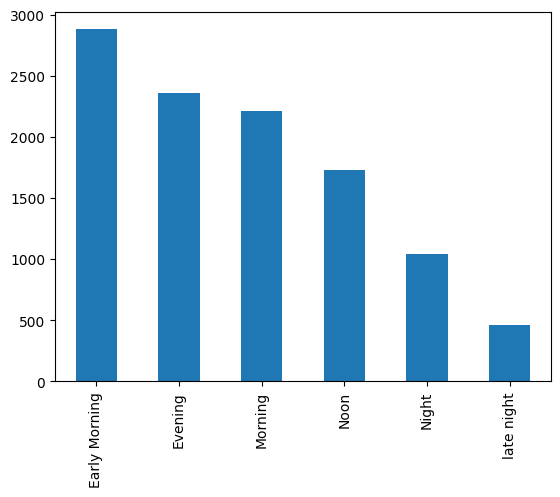

In [35]:
# Distribution of Flights
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [37]:
# Let's preprocess Duration feature
def preprocess_duration(x):
  '''
  This function modifies duration to fit into Xh Ym format in case one is missing
  '''
  if 'h' not in x:
    x = '0h' + ' ' + x
  elif 'm' not in x:
    x = x + ' ' + '0m'

  return x

In [38]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [40]:
# Here we convert Duration into numeric values
data['Duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))
data['Duration_minutes'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


In [42]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', "*60").str.replace(' ', '+').str.replace('m', "*1").apply(eval)

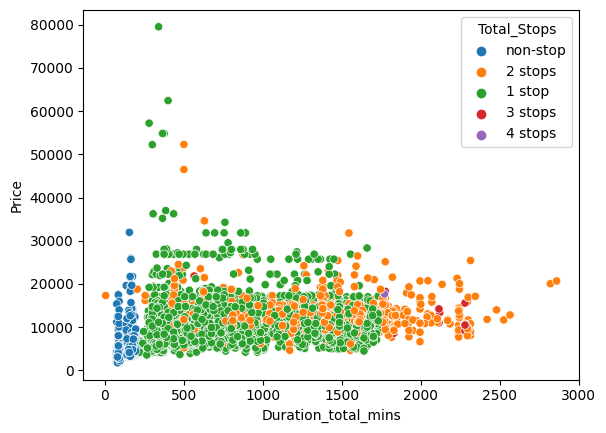

In [45]:
## Let's analyze Duration impacts on Price or not?
sns.scatterplot( x = "Duration_total_mins", y = "Price", hue = "Total_Stops",  data = data);